Accuracy Score: 0.7179285714285715


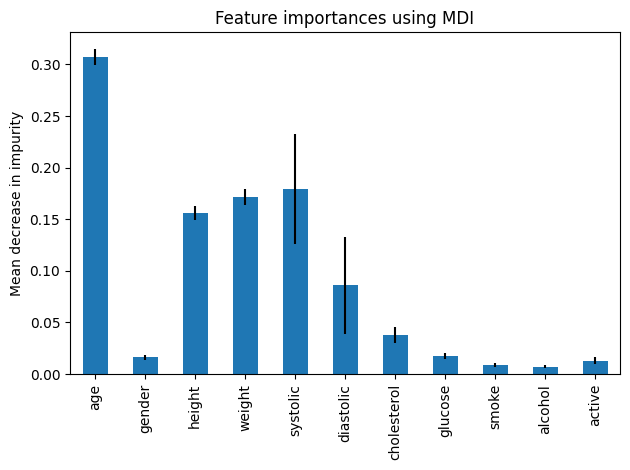

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

df = pd.read_csv('cardio_train.csv', sep=';')
df = df. rename(columns={df. columns[5]: 'systolic'})
df = df. rename(columns={df. columns[6]: 'diastolic'})
df = df. rename(columns={df. columns[8]: 'glucose'})
df = df. rename(columns={df. columns[10]: 'alcohol'})
df = df. rename(columns={df. columns[12]: 'disease'})

#Split dataset
target_col = 'disease'  # Replace with the actual target column name
X = df.drop(target_col, axis=1)  # Features
Y = df[target_col]

X = X.drop(['id'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#Inspect cleaned and split dataset
# print("Training features:\n", X_train)
# print("Training target distribution:\n", y_train.value_counts())


feature_names = [f"{X.columns[i]}" for i in range(X.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

forest_importances = pd.Series(importances, index=feature_names)

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {acc}")

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()